## Support Vector Regression

### Introduction

Supervised Machine Learning Models with associated learning algorithms that analyze data for classification and regression analysis are known as Support Vector Regression. 
SVR is built based on the concept of Support Vector Machine or SVM.

SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

### The Idea Behind Support Vector Regression

The problem of regression is to find a function that approximates mapping from an input domain to real numbers on the basis of a training sample. So let’s now dive deep and understand how SVR works actually.

![Support Vector Regression](svr.png "Support Vector Regression")
![Support Vector Regression Tube](svrtube.png "Support Vector Regression Tube")
![Support Vector Regression Terminology](epsilon.png "Support Vector Regression Terminology")



Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.

Assuming that the equation of the hyperplane is as follows:

$$ Y = wx+b $$ (equation of hyperplane)
Then the equations of decision boundary become:

$$ wx+b = +a $$

$$ wx+b= -a $$
Thus, any hyperplane that satisfies our SVR should satisfy:

$$ -a < Y- wx+b < +a $$ 

   
    Our main aim here is to decide a decision boundary at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.

Hence, we are going to take only those points that are within the decision boundary and have the least error rate, or are within the Margin of Tolerance. This gives us a better fitting model.

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


We can see that the feature matrix X is 2D array with one column and elements are array themself while target vector Y is 1D array.

So we need to reshape our Y matrix from 1D to 2D

For this reshaping we are going to use the reshape method which requires number of rows and columns as argument.

In [5]:
Y = Y.reshape(len(Y),1)

In [6]:
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

We are directly applying feature scaling to feature matrix X and target vector Y and not splting the dataset as we have less data.

Here we are creating two StandardScaler object because scaling of matrix is done by finding the average, mean or standard deviation of the matrix and as matrix X and Y are different matrix we have to use two scaler objects.

After that we apply the fit transform method on the scaler object to transform the original matrix to the scaled matrix.

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR on whole dataset

To create the SVR model we are going to use the SVR class of the svm module of the sklearn library.

First we create the instance of SVR class which requires the kernel to be used.

In case of regression using SVM we use the Radial basis function (rbf).

After that we train our model on feature matrix X and target vector Y.

    We can choose to make linear SVR or non linear SVR by specifying the linear or non linear kernel.

In [36]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y.ravel())

SVR()

## Predicting the result

To predict the result we can simply just apply the predict method to our model which takes the the value to predict as 2D array.

Like this--
     regressor.predict([[value]])
     
But the problem is that we have scaled our feature matrix so we cant directly input the value as it is to predict method as predict method will predict badly as the value is not on scale of the scaled feature matrix.


       --Line(1)--
To solve this issue we transform our value on the scale of transformed feature matrix.
For this we use the transform method on our scaler object of feature matrix which takes value as argument.
And after this predict method will return the predicted value of target vector Y according the scale we have scaled Y on.
   
       --Line(2)--
So to get the actual scale value we have to inverse the scaled value to non scaled value and for that we use the inverse method on our scaler object of target vector which accepts the scaled value to be predicted.
          
       

In [37]:
scaled_predicted_y = regressor.predict(sc_X.transform([[6.5]]))
actual_predicted_y = sc_Y.inverse_transform(scaled_predicted_y)

In [38]:
print(scaled_predicted_y)

[-0.27861589]


In [39]:
print(actual_predicted_y)

[170370.0204065]


## Visualizing the SVR result

We can simply pass the feature matrix X and the predictor to plot method to get the visualization.

Like this--
    plt.plot(X, regressor.predict(X), color='blue')

But as we have applied feature scaling we have to inverse the scaled values to their original form to get the visualization valeus in original form.

i.e scaled value of X back to actual value using the inverse_transform method on sc_X scaler object.

and scaled value of Y back to actual value using the inverse_transform method on sc_Y scaler object.

and also predicted value of Y on value of X via predict method on our model back to actual value of Y using the inverse_transform method on scaler object sc_Y on this predicted value.

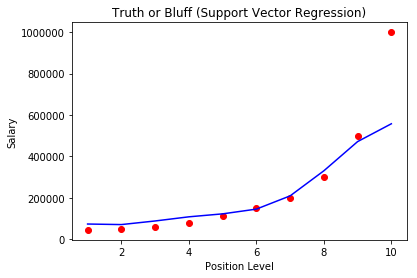

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [40]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
print(sc_X.inverse_transform(X))

## Visualization of SVR (for higher resolution and smoother curve) 

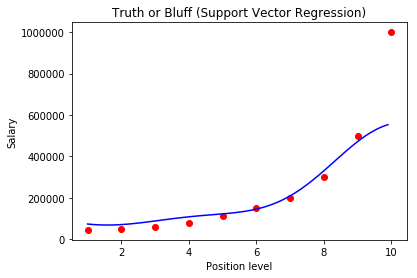

In [41]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()